In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
epa = pd.read_csv('../datasets/epa_violations.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
epa.head()

,Company,Parent Company,Penalty Amount,Subtraction From Penalty,Penalty Amount Adjusted For Eliminating Multiple Counting,Penalty Year,Penalty Date,Primary Offense,Secondary Offense,Description,...,Parent Company Stock Ticker,Major Industry of Parent,Specific Industry of Parent,Info Source,Info Source Archive URL,PACER Link,Captured Document,EPA/OSHA More Info Link,Notes,penalty_amt
0,5N Plus Inc.,NaN,"$61,150",$0,"$61,150",2013,20130328,environmental violation,NaN,"A Fairfield, Conn. company that develops and p...",...,NaN,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/0c0af...,screenshot_99713.png,NaN,NaN,NaN,NaN,61150
1,A&L Cesspool Service Corporation,NaN,"$900,000",$0,"$900,000",2016,20161026,environmental violation,NaN,A&L Cesspool Service Corporation pled guilty a...,...,NaN,NaN,NaN,https://cfpub.epa.gov/compliance/criminal_pros...,chunk_1screenshot_734000_6334526091881956598.png,NaN,NaN,NaN,NaN,900000
2,A-1 Barrel,NaN,"$15,125",$0,"$15,125",2012,20120911,environmental violation,NaN,"A-1 Barrel Company, LLC is a used drum washing...",...,NaN,NaN,NaN,http://cfpub.epa.gov/compliance/criminal_prose...,screenshot_100029.png,NaN,NaN,NaN,NaN,15125
3,"A-1 Petroleum and Propane, Inc.",NaN,"$40,000",$0,"$40,000",2015,20151001,environmental violation,NaN,"A-1 Petroleum and Propane, Inc., located in El...",...,NaN,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/21b89...,screenshot_100095.png,NaN,NaN,NaN,NaN,40000
4,"A-1 Restaurant Services, L.L.C.",NaN,"$200,000",$0,"$200,000",2016,20151119,environmental violation,NaN,NaN,...,NaN,NaN,NaN,https://cfpub.epa.gov/compliance/criminal_pros...,screenshot_194821.png,NaN,NaN,NaN,NaN,200000


In [4]:
cols = [col for col in epa.columns]
penalty_amt = 'Penalty Amount Adjusted For Eliminating Multiple Counting'

# create a new row with penalty amount as int
penalty_int = [int(entry.replace('$', '').replace(',','')) for entry in epa[penalty_amt]]
epa['penalty_amt'] = penalty_int

In [5]:
cols_of_interest = ['penalty_amt', 'Company', 'Parent Company', 'Parent Company Stock Ticker', 'Penalty Year', 'Penalty Date']

In [6]:
# create a new dataframe only with the above columns
epa_cols_interest = epa[cols_of_interest].copy()

In [7]:
# drop NaN rows and reindex our table
epa_cols_interest = epa_cols_interest.dropna()
epa_cols_interest = epa_cols_interest.reset_index()

In [8]:
# sort by highest fine
# epa_cols_interest.sort_values(by=['Parent Company Stock Ticker'], ascending=False)
epa_cols_interest.sort_values(by=['penalty_amt'], ascending=False)

,index,penalty_amt,Company,Parent Company,Parent Company Stock Ticker,Penalty Year,Penalty Date
20,62,5150000000,Anadarko Petroleum Corp.,Anadarko Petroleum,APC,2015,20150123
17,54,4675000000,American Electric Power,American Electric Power,AEP,2007,20071009
75,209,1430000000,Cinergy Corporation,Duke Energy,DUK,2000,20001222
9128,40215,1219200000,Virginia Electric Power Co.,Dominion Energy,D,2003,20030421
8167,36055,1133500000,Ohio Edison Company,FirstEnergy,FE,2005,20050318
9167,40339,1010950000,Wisconsin Power and Light Company,Alliant Energy,LNT,2013,20130422
9091,40101,1000000000,Transocean,Transocean,RIG,2013,20130103
8097,35750,810200000,"Mosaic Fertilizer, LLC",Mosaic,MOS,2015,20151001
9122,40192,711000000,Valero,Valero Energy,VLO,2005,20050616
37,121,660000000,BP,BP,BP,2001,20010118


In [19]:
# TODO:
#   split fines by amount
# Fines here are split by billions, millions, thousands, and hundreds

fines_bill = epa_cols_interest[epa_cols_interest['penalty_amt'] > 999999999]
fines_mill = epa_cols_interest[epa_cols_interest['penalty_amt'].between(999999, 999999999)]
fines_thou = epa_cols_interest[epa_cols_interest['penalty_amt'].between(999, 999999)]
fines_hund = epa_cols_interest[epa_cols_interest['penalty_amt'].between(0, 998, inclusive=True)]

In [52]:
def plot_years_sum(df):
    fine_by_year = []
    unique_years = df['Penalty Year'].unique()
    for year in unique_years:
        epa_years = df[df['Penalty Year'] == year]
        fine_by_year += [(sum(epa_years['penalty_amt']), year)]
        
    sorted_fines = sorted(fine_by_year, key = lambda x: x[1])
    x_axis = [year for _,year in sorted_fines]
    y_axis = [fine for fine,_ in sorted_fines]
    
    plt.plot(x_axis, y_axis)
    plt.title("Fines by Year")
    plt.show()

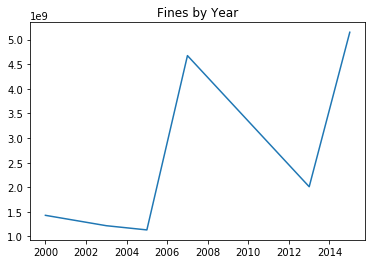

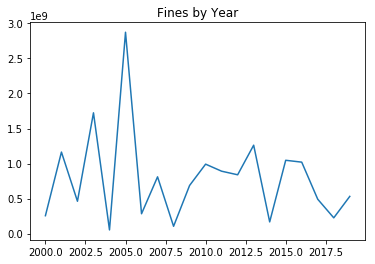

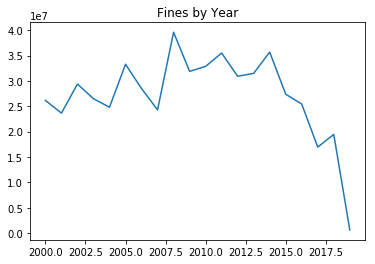

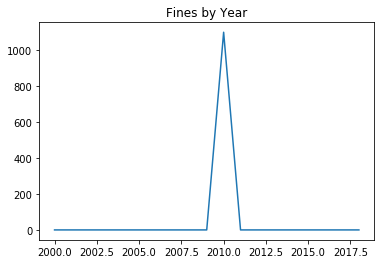

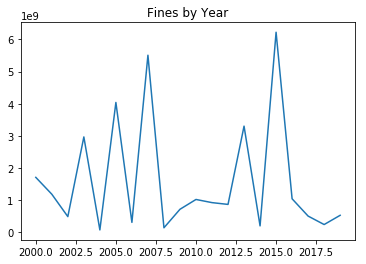

In [53]:
plot_years_sum(fines_bill)
plot_years_sum(fines_mill)
plot_years_sum(fines_thou)
plot_years_sum(fines_hund)
plot_years_sum(epa_cols_interest)

In [77]:
# TOP FINES BY YEAR (using main dataframe epa_cols_interest)
unique_years = sorted(epa_cols_interest['Penalty Year'].unique())
for year in unique_years:
    this_year = epa_cols_interest[epa_cols_interest['Penalty Year'] == year]
    penalty = list(this_year['penalty_amt'])
    ticker = list(this_year['Parent Company Stock Ticker'])
    max_ = max(zip(penalty, ticker))
    print(year, *max_)

2000 1430000000 DUK
2001 660000000 BP
2002 344400000 PEG
2003 1219200000 D
2004 22000000 IEP
2005 1133500000 FE
2006 200000000 SO
2007 4675000000 AEP
2008 37000000 RSG
2009 179000000 MPC
2010 509000000 EVRG
2011 613000000 NI
2012 408000000 BP
2013 1010950000 LNT
2014 63000000 GRA
2015 5150000000 APC
2016 425450000 MPC
2017 302500000 XOM
2018 152950000 CVX
2019 515000000 FCAM


<h1> not really running this </h1>

In [13]:
sd = epa_cols_interest['penalty_amt'].std()
avg = epa_cols_interest['penalty_amt'].mean()

In [14]:
#normalize values
z_score = lambda x: ((x - avg) / float(sd))

epa_cols_interest['normalized_amt'] = [z_score(val) for val in epa_cols_interest['penalty_amt']]

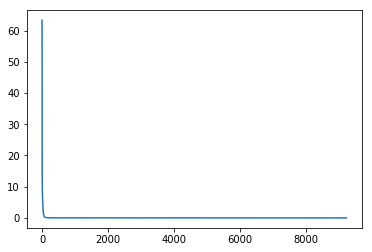

In [16]:
test_set = sorted(epa_cols_interest['normalized_amt'])[::-1]
test_set

plt.plot(test_set)
plt.show()